# **Multi-layer Perceptron**


| Operation | Description |
|-----------|-------------|
| R3 ← R4 + R2 | Connect outputs of R4 and R2 to ALU1 inputs. ALU1 set to add. Output routed to R3. |
| R4 ← R8 AND R9 | Outputs of R8 and R9 to ALU2 inputs. ALU2 set to AND. Output routed to R4. |
| Mem[R8] ← R7 + 8 | Output of R7 to ALU2 input, other input is '8'. Output of ALU2 written to Mem at address R8. |


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 8s 29ms/step - loss: 6.3327 - mae: 2.1136
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 4.3968 - mae: 1.6692
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 2.9192 - mae: 1.2797
Epoch 4/100
7/7 [==============================] - 0s 25ms/step - loss: 1.8275 - mae: 1.0005
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 1.3738 - mae: 0.8977
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 1.2358 - mae: 0.8721
Epoch 7/100
7/7 [==============================] - 0s 25ms/step - loss: 1.2209 - mae: 0.8518
Epoch 8/100
7/7 [==============================] - 0s 20ms/step - loss: 1.1726 - mae: 0.8238
Epoch 9/100
7/7 [==============================] - 0s 21ms/step - loss: 1.1195 - mae: 0.8047
Epoch 10/100
7/7 [==============================] - 0s 23ms/step - loss: 1.0938 - mae: 0.7905
Epoch 11/100
7/7 [==============================] - 0s 21ms/step - lo

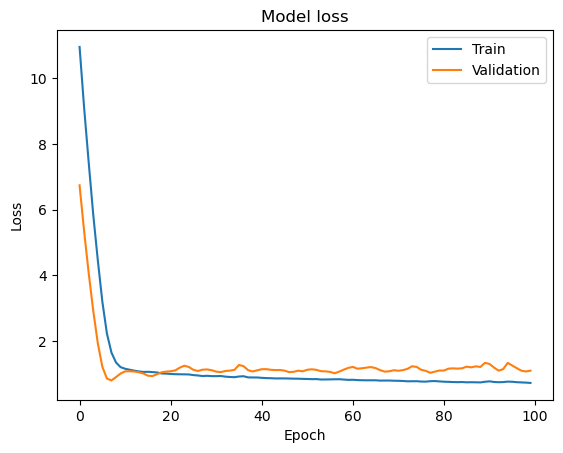

In [2]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Assignment:** what is a Validation Set? or validation loss?

---

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 10.0162 - val_loss: 5.7871
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 8.0024 - val_loss: 4.4568
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 6.3845 - val_loss: 3.4254
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 5.1356 - val_loss: 2.6657
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 4.0937 - val_loss: 2.1243
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 3.3113 - val_loss: 1.7419
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 2.6807 - val_loss: 1.4831
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 2.1848 - val_loss: 1.3308
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 1.8741 - val_loss: 1.2552
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 1.5848 - val_loss: 1.2181
Epoch 11/100
7/7 [

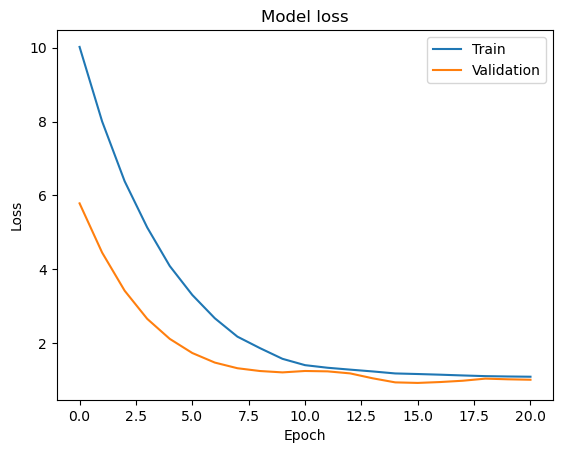

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()